Dataset dimensions: (821, 6)

First few rows of the dataset:
   ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY   
0         1.5          4                   7.9                  6.3  \
1         1.5          4                   8.1                  6.5   
2         1.5          4                   8.9                  6.5   
3         3.5          6                  12.6                  9.4   
4         3.0          6                  13.8                 11.2   

   FUELCONSUMPTION_COMB  CO2EMISSIONS  
0                   7.2           167  
1                   7.4           172  
2                   7.8           181  
3                  11.2           263  
4                  12.4           291  

Data types:
ENGINESIZE              float64
CYLINDERS                 int64
FUELCONSUMPTION_CITY    float64
FUELCONSUMPTION_HWY     float64
FUELCONSUMPTION_COMB    float64
CO2EMISSIONS              int64
dtype: object

Missing values:
ENGINESIZE              0
CYLINDERS 

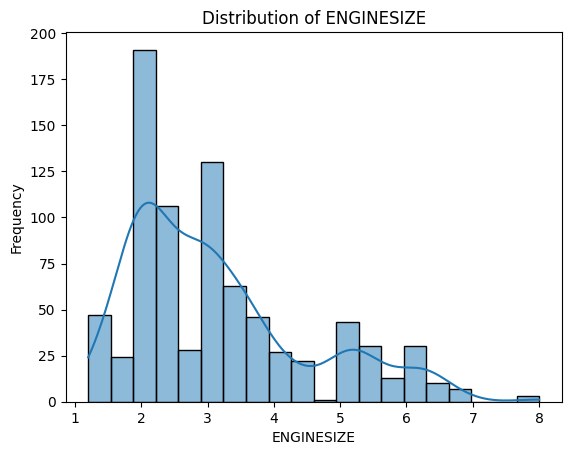

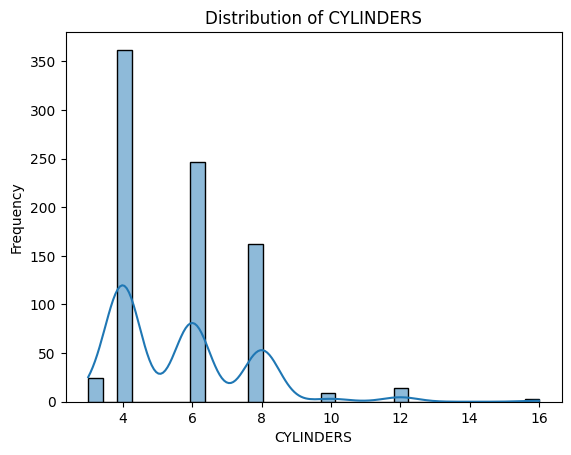

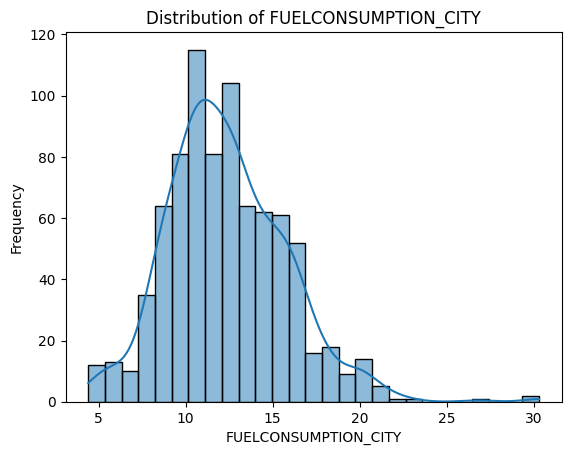

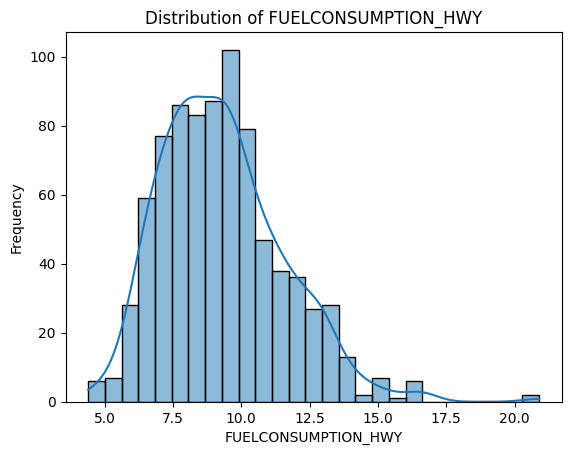

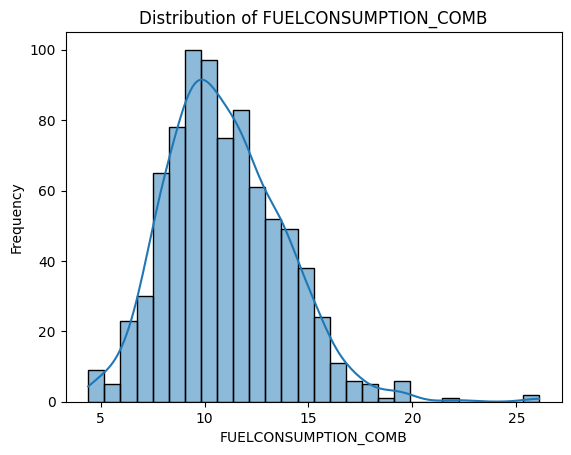

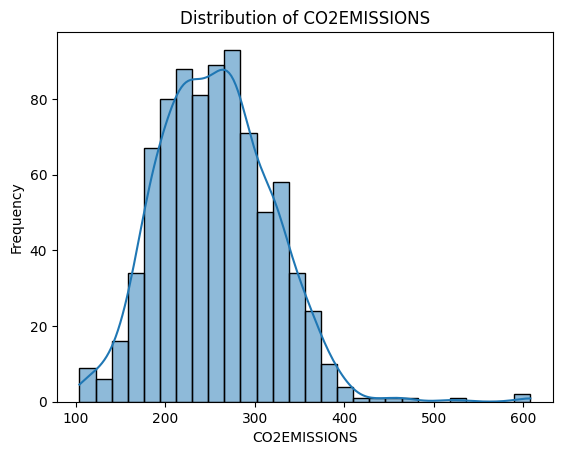

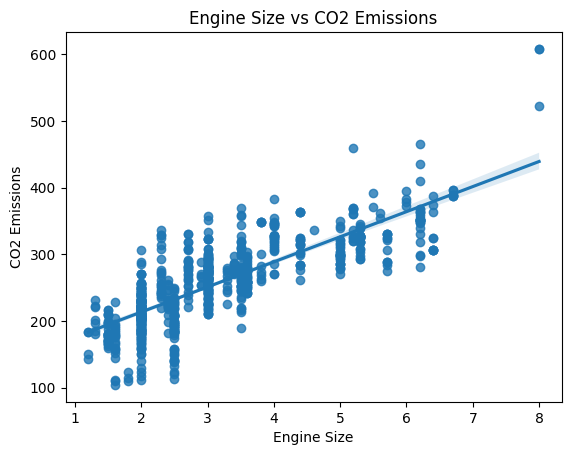

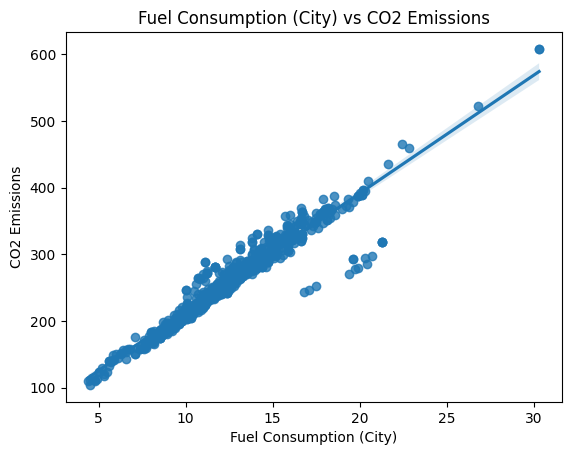

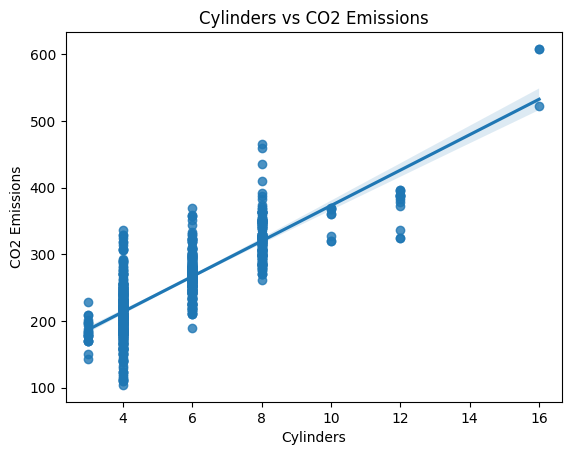

Linear Regression MSE: 0.001236137922079487
Linear Regression R-squared: 0.9073133361860126


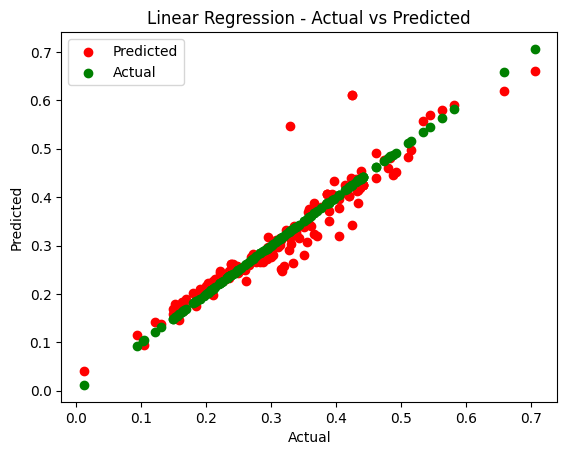

Support Vector Regression MSE: 0.00202689223226129
Support Vector Regression R-squared: 0.8480219111773967


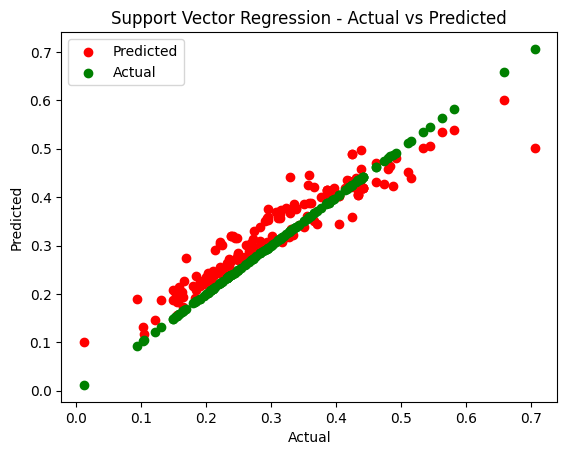

Multilayer Perceptron MSE: 0.0017731742825750885
Multilayer Perceptron R-squared: 0.8670458970013887


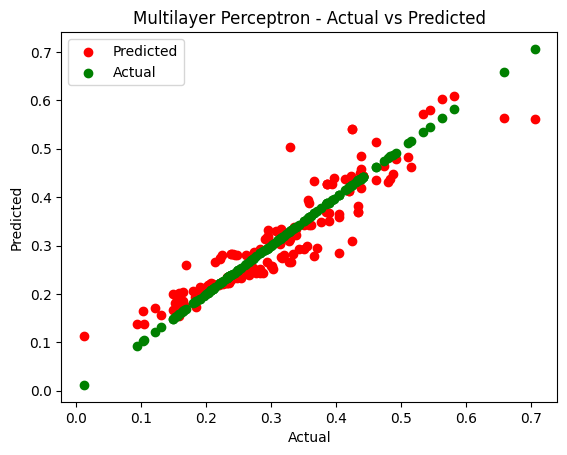

Decision Tree MSE: 0.00046332294696345986
Decision Tree R-squared: 0.965259654723426


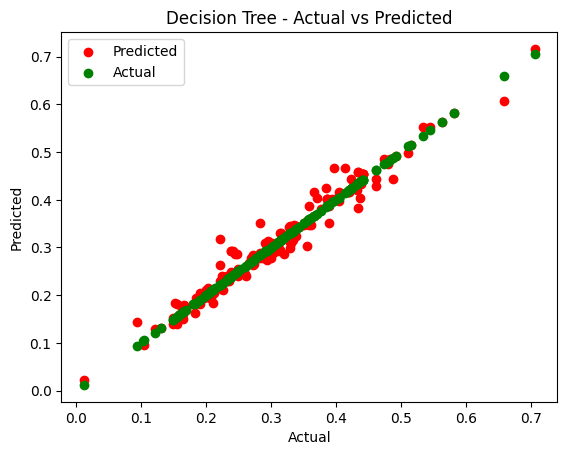

Random Forest MSE: 0.0005015936419074162
Random Forest R-squared: 0.9623900857434282


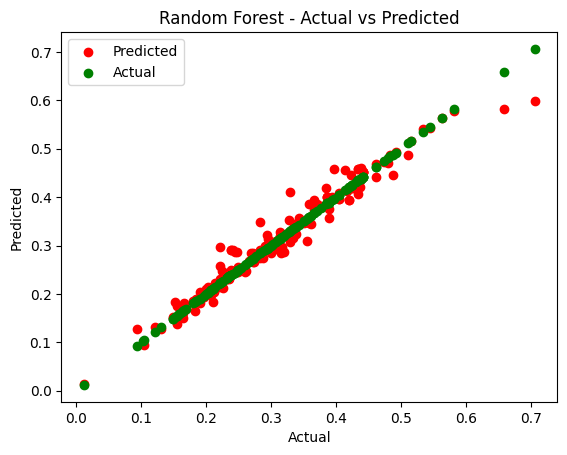

Gradient Boosting MSE: 0.0005706106245511002
Gradient Boosting R-squared: 0.9572151341838242


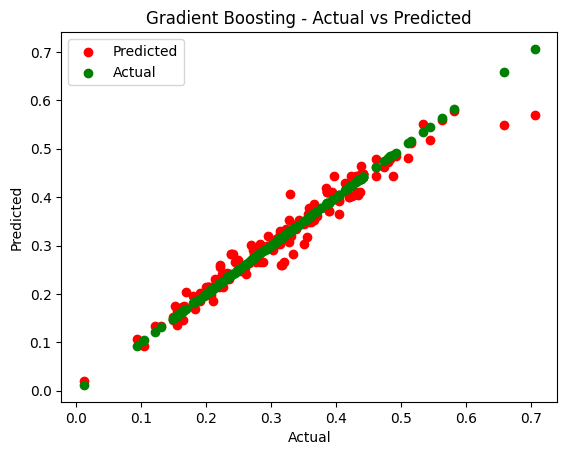

K-Nearest Neighbors MSE: 0.0011560588882017447
K-Nearest Neighbors R-squared: 0.9133177296756073


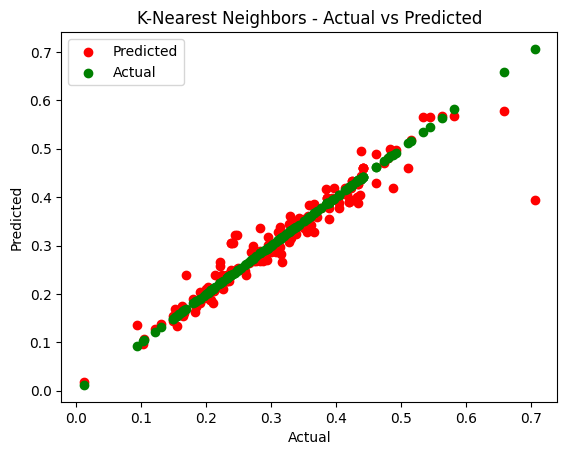

Tuned Linear Regression MSE: 0.001236137922079487
Tuned Linear Regression R-squared: 0.9073133361860126


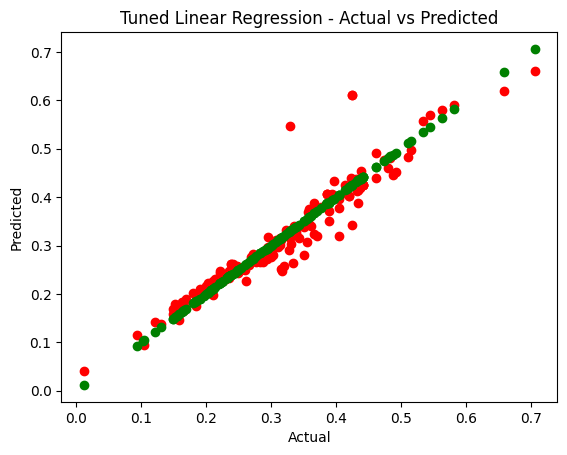

Tuned Support Vector Regression MSE: 0.001102549653675977
Tuned Support Vector Regression R-squared: 0.9173298972038799


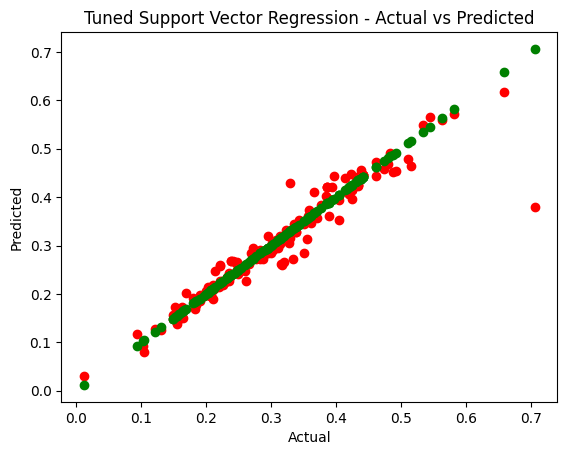

Tuned Multilayer Perceptron MSE: 0.0020773202282886797
Tuned Multilayer Perceptron R-squared: 0.8442407775100944


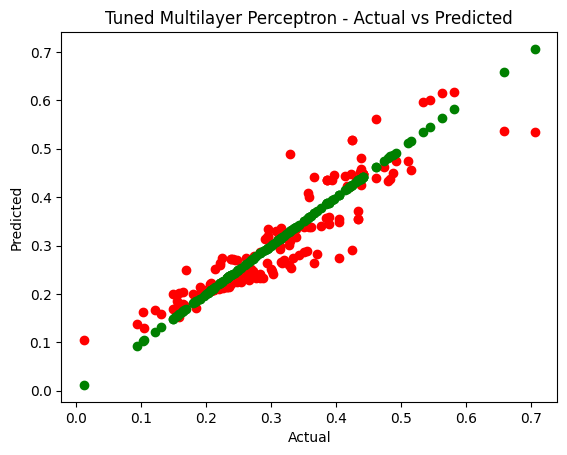

Tuned Decision Tree MSE: 0.0004935339339645704
Tuned Decision Tree R-squared: 0.962994409441613


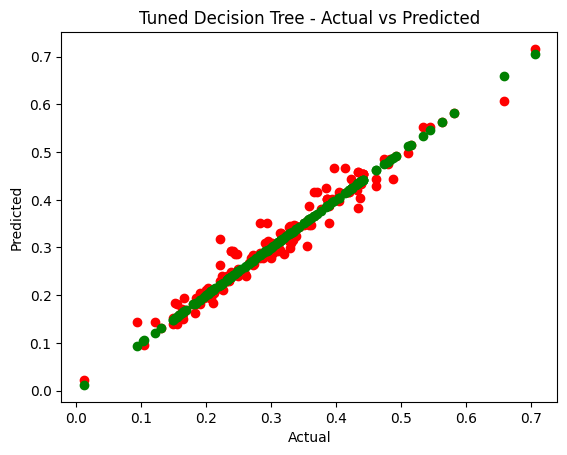

Tuned Random Forest MSE: 0.0005037295510641862
Tuned Random Forest R-squared: 0.9622299334736737


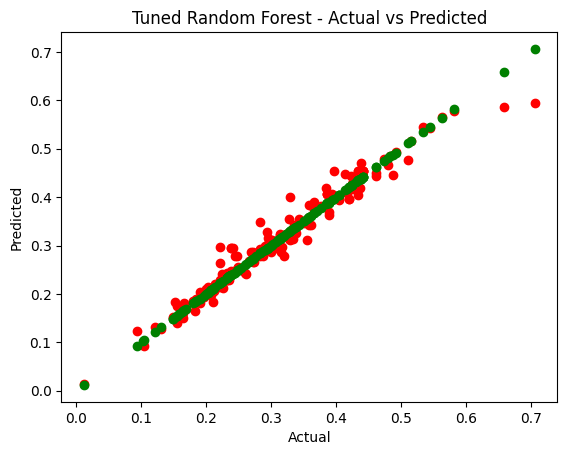

Tuned K-Nearest Neighbor MSE: 0.0011157135255423325
Tuned K-Nearest Neighbor R-squared: 0.916342858990446


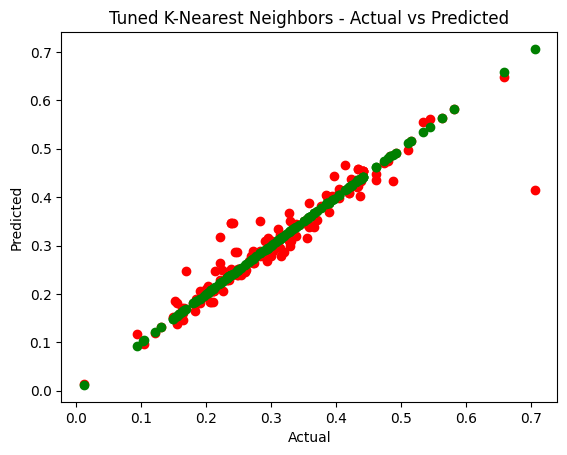

Tuned Gradient Boosting MSE: 0.0005858043016273313
Tuned Gradient Boosting R-squared: 0.9560758994640497


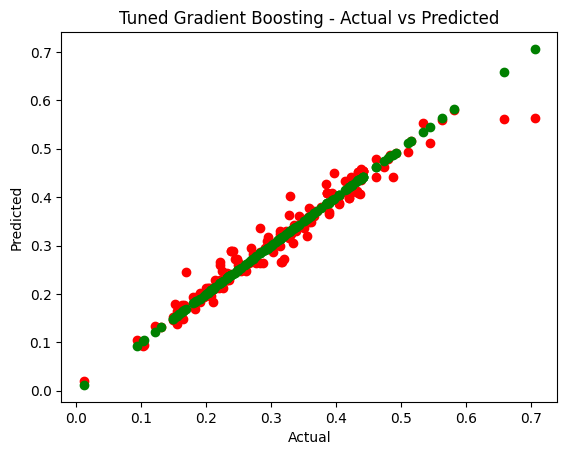

Model: LinearRegression
Cross-validated R-squared scores: [0.98287787 0.54786272 0.89588417 0.96915501 0.97288009]
Mean R-squared: 0.8737319733779648

Model: SVR
Cross-validated R-squared scores: [0.57997223 0.70716659 0.88101149 0.80113308 0.86984639]
Mean R-squared: 0.7678259545797379

Model: MLPRegressor
Cross-validated R-squared scores: [0.90220969 0.53333282 0.81841938 0.78688309 0.87779703]
Mean R-squared: 0.7837284022023642

Model: DecisionTreeRegressor
Cross-validated R-squared scores: [0.88486808 0.78463016 0.92812253 0.94795884 0.98019974]
Mean R-squared: 0.905155871545119

Model: RandomForestRegressor
Cross-validated R-squared scores: [0.88414912 0.77692048 0.95470344 0.95734916 0.98498979]
Mean R-squared: 0.9116223997692969

Model: GradientBoostingRegressor
Cross-validated R-squared scores: [0.92259629 0.73431622 0.94781794 0.96097364 0.98630838]
Mean R-squared: 0.9104024940669835

Model: KNeighborsRegressor
Cross-validated R-squared scores: [0.79158258 0.70418145 0.9433905

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Load the dataset from a CSV file
df = pd.read_csv('FuelConsumption2023.csv', encoding='latin-1')

# Select specific columns of interest
df = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]


# Data exploration :
### Examine dataset dimensions
print("Dataset dimensions:", df.shape)  

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")  
print(df.head())

# Display the data types of each column
print("\nData types:")  
print(df.dtypes)

# Count the number of missing values in each column
print("\nMissing values:")  
print(df.isnull().sum())

# Summary statistics of numerical columns
print("\nSummary statistics:")   
print(df.describe())

# Unique values in categorical columns
print("\nUnique values in categorical columns:")  
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].unique()}")
    
    
# Data preprocessing
df.dropna(inplace=True)
# Perform one-hot encoding if needed
df_encoded = pd.get_dummies(df)  

# Perform feature scaling or normalization if required
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)


# Check the column names of the Scaled Dataframe :
print(df_scaled.columns)


df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
        'CO2EMISSIONS']]


# Visualize the distribution of numeric columns using histograms and KDE plots
numeric_columns = df.select_dtypes(include=np.number).columns
for column in numeric_columns:
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {column}")
    plt.show()

# Visualize the relationships between variables using scatter plots with regression lines
sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=df)
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("Engine Size vs CO2 Emissions")
plt.show()

sns.regplot(x="FUELCONSUMPTION_CITY", y="CO2EMISSIONS", data=df)
plt.xlabel("Fuel Consumption (City)")
plt.ylabel("CO2 Emissions")
plt.title("Fuel Consumption (City) vs CO2 Emissions")
plt.show()

sns.regplot(x="CYLINDERS", y="CO2EMISSIONS", data=df)
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions")
plt.title("Cylinders vs CO2 Emissions")
plt.show()


# Data preprocessing

# Handle missing values
df.dropna(inplace=True)

# Encode categorical variables (if any)
# Example: One-hot encoding
df = pd.get_dummies(df)

# Perform feature scaling or normalization (if required)
# Example: Min-max scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Selecting Features
selected_features = [ "ENGINESIZE", "FUELCONSUMPTION_CITY", "CYLINDERS"]
X = df_scaled[selected_features]
y = df_scaled["CO2EMISSIONS"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training and evaluation

# Linear Regression (LR)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print("Linear Regression MSE:", lr_mse)
print("Linear Regression R-squared:", lr_r2)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, lr_predictions, c='red', label='Predicted')
plt.scatter(y_test, y_test, c='green', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression - Actual vs Predicted')
plt.legend()
plt.show()



# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)
print("Support Vector Regression MSE:", svr_mse)
print("Support Vector Regression R-squared:", svr_r2)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, svr_predictions, c='red', label='Predicted')
plt.scatter(y_test, y_test, c='green', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Support Vector Regression - Actual vs Predicted')
plt.legend()
plt.show()

# Multilayer Perceptron (MLP)
mlp_model = MLPRegressor()
mlp_model.fit(X_train, y_train)
mlp_predictions = mlp_model.predict(X_test)
mlp_mse = mean_squared_error(y_test, mlp_predictions)
mlp_r2 = r2_score(y_test, mlp_predictions)
print("Multilayer Perceptron MSE:", mlp_mse)
print("Multilayer Perceptron R-squared:", mlp_r2)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, mlp_predictions, c='red', label='Predicted')
plt.scatter(y_test, y_test, c='green', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multilayer Perceptron - Actual vs Predicted')
plt.legend()
plt.show()

# Decision Tree (Regression)
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)
decision_tree_predictions = decision_tree_regressor.predict(X_test)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)
print("Decision Tree MSE:", decision_tree_mse)
print("Decision Tree R-squared:", decision_tree_r2)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, decision_tree_predictions, c='red', label='Predicted')
plt.scatter(y_test, y_test, c='green', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree - Actual vs Predicted')
plt.legend()
plt.show()

# Random Forest
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)
print("Random Forest MSE:", random_forest_mse)
print("Random Forest R-squared:", random_forest_r2)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, random_forest_predictions, c='red', label='Predicted')
plt.scatter(y_test, y_test, c='green', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest - Actual vs Predicted')
plt.legend()
plt.show()

# Gradient Boosting (GB)
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train, y_train)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_predictions)
gradient_boosting_r2 = r2_score(y_test, gradient_boosting_predictions)
print("Gradient Boosting MSE:", gradient_boosting_mse)
print("Gradient Boosting R-squared:", gradient_boosting_r2)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, gradient_boosting_predictions, c='red', label='Predicted')
plt.scatter(y_test, y_test, c='green', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting - Actual vs Predicted')
plt.legend()
plt.show()

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
print("K-Nearest Neighbors MSE:", knn_mse)
print("K-Nearest Neighbors R-squared:", knn_r2)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, knn_predictions, c='red', label='Predicted')
plt.scatter(y_test, y_test, c='green', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('K-Nearest Neighbors - Actual vs Predicted')
plt.legend()
plt.show()


# Model Tuning

# Define the hyperparameter grid for each model
lr_param_grid = {'fit_intercept': [True, False]}
svr_param_grid = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]}
mlp_param_grid = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['relu', 'tanh']}
dt_param_grid = {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
knn_param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
gb_param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1]}

# Perform grid search for each model
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)

svr_grid_search = GridSearchCV(svr_model, svr_param_grid, cv=5)
svr_grid_search.fit(X_train, y_train)

mlp_grid_search = GridSearchCV(mlp_model, mlp_param_grid, cv=5)
mlp_grid_search.fit(X_train, y_train)

dt_grid_search = GridSearchCV(decision_tree_regressor, dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)

rf_grid_search = GridSearchCV(random_forest_model, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

gb_grid_search = GridSearchCV(gradient_boosting_model, gb_param_grid, cv=5)
gb_grid_search.fit(X_train, y_train)

# Evaluate the tuned models

lr_predictions_tuned = lr_grid_search.predict(X_test)
lr_mse_tuned = mean_squared_error(y_test, lr_predictions_tuned)
lr_r2_tuned = r2_score(y_test, lr_predictions_tuned)
print("Tuned Linear Regression MSE:", lr_mse_tuned)
print("Tuned Linear Regression R-squared:", lr_r2_tuned)

plt.scatter(y_test, lr_predictions_tuned, c='red')
plt.scatter(y_test, y_test, c='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Tuned Linear Regression - Actual vs Predicted')
plt.show()

svr_predictions_tuned = svr_grid_search.predict(X_test)
svr_mse_tuned = mean_squared_error(y_test, svr_predictions_tuned)
svr_r2_tuned = r2_score(y_test, svr_predictions_tuned)
print("Tuned Support Vector Regression MSE:", svr_mse_tuned)
print("Tuned Support Vector Regression R-squared:", svr_r2_tuned)

plt.scatter(y_test, svr_predictions_tuned, c='red')
plt.scatter(y_test, y_test, c='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Tuned Support Vector Regression - Actual vs Predicted')
plt.show()

mlp_predictions_tuned = mlp_grid_search.predict(X_test)
mlp_mse_tuned = mean_squared_error(y_test, mlp_predictions_tuned)
mlp_r2_tuned = r2_score(y_test, mlp_predictions_tuned)
print("Tuned Multilayer Perceptron MSE:", mlp_mse_tuned)
print("Tuned Multilayer Perceptron R-squared:", mlp_r2_tuned)

plt.scatter(y_test, mlp_predictions_tuned, c='red')
plt.scatter(y_test, y_test, c='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Tuned Multilayer Perceptron - Actual vs Predicted')
plt.show()

dt_predictions_tuned = dt_grid_search.predict(X_test)
dt_mse_tuned = mean_squared_error(y_test, dt_predictions_tuned)
dt_r2_tuned = r2_score(y_test, dt_predictions_tuned)
print("Tuned Decision Tree MSE:", dt_mse_tuned)
print("Tuned Decision Tree R-squared:", dt_r2_tuned)

plt.scatter(y_test, dt_predictions_tuned, c='red')
plt.scatter(y_test, y_test, c='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Tuned Decision Tree - Actual vs Predicted')
plt.show()

rf_predictions_tuned = rf_grid_search.predict(X_test)
rf_mse_tuned = mean_squared_error(y_test, rf_predictions_tuned)
rf_r2_tuned = r2_score(y_test, rf_predictions_tuned)
print("Tuned Random Forest MSE:", rf_mse_tuned)
print("Tuned Random Forest R-squared:", rf_r2_tuned)

plt.scatter(y_test, rf_predictions_tuned, c='red')
plt.scatter(y_test, y_test, c='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Tuned Random Forest - Actual vs Predicted')
plt.show()

knn_predictions_tuned = knn_grid_search.predict(X_test)
knn_mse_tuned = mean_squared_error(y_test, knn_predictions_tuned)
knn_r2_tuned = r2_score(y_test, knn_predictions_tuned)
print("Tuned K-Nearest Neighbor MSE:", knn_mse_tuned)
print("Tuned K-Nearest Neighbor R-squared:", knn_r2_tuned)

plt.scatter(y_test, knn_predictions_tuned, c='red')
plt.scatter(y_test, y_test, c='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Tuned K-Nearest Neighbors - Actual vs Predicted')
plt.show()

gb_predictions_tuned = gb_grid_search.predict(X_test)
gb_mse_tuned = mean_squared_error(y_test, gb_predictions_tuned)
gb_r2_tuned = r2_score(y_test, gb_predictions_tuned)
print("Tuned Gradient Boosting MSE:", gb_mse_tuned)
print("Tuned Gradient Boosting R-squared:", gb_r2_tuned)

plt.scatter(y_test, gb_predictions_tuned, c='red')
plt.scatter(y_test, y_test, c='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Tuned Gradient Boosting - Actual vs Predicted')
plt.show()


# Model validation using cross-validation

models = [lr_model, svr_model, mlp_model, decision_tree_regressor,
          random_forest_model, gradient_boosting_model, knn_model]

for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print("Model:", type(model).__name__)
    print("Cross-validated R-squared scores:", scores)
    print("Mean R-squared:", np.mean(scores))
    print()





Working on a regression problem using various machine learning models to predict " CO2 emissions canada 2023 " based on features such as engine size, fuel consumption, and cylinders. Here's a breakdown of the code you provided:

1. Importing libraries:
   - Pandas: for data manipulation and analysis
   - NumPy: for numerical operations
   - Matplotlib: for data visualization
   - Seaborn: for statistical data visualization
   - Various modules from scikit-learn: for machine learning algorithms and evaluation metrics

2. Loading the dataset:
   - The dataset is loaded from a CSV file called 'FuelConsumption2023.csv' using `pd.read_csv()`.
   - The columns of interest are selected and stored in the 'df' DataFrame.

3. Data exploration:
   - Dataset dimensions are printed using `df.shape`.
   - The first few rows of the dataset are displayed using `df.head()`.
   - Data types of each column are printed using `df.dtypes`.
   - The number of missing values in each column is displayed using `df.isnull().sum()`.
   - Summary statistics of numerical columns are printed using `df.describe()`.
   - Unique values in categorical columns (if any) are displayed using a loop.

4. Data preprocessing:
   - Missing values are dropped from the dataset using `df.dropna()`.
   - One-hot encoding is performed on categorical columns (if any) using `pd.get_dummies()`.
   - Feature scaling or normalization is performed on the encoded dataset using `MinMaxScaler()`.

5. Data visualization:
   - The distribution of numeric columns is visualized using histograms and KDE plots with the help of `sns.histplot()`.
   - Relationships between variables are visualized using scatter plots with regression lines using `sns.regplot()`.


6. Model training and evaluation:
   - Selected features and target variable are assigned to 'X' and 'y', respectively.
   - The data is split into training and testing sets using `train_test_split()`.
   - Several regression models are trained on the training set and evaluated on the testing set:
     - Linear Regression (LR)
     - Support Vector Regression (SVR)
     - Multilayer Perceptron (MLP)
     - Decision Tree (Regression)
     - Random Forest
     - Gradient Boosting (GB)
     - K-Nearest Neighbors (KNN)
   - Evaluation metrics (MSE and R-squared) are calculated using `mean_squared_error()` and `r2_score()`.
   - Scatter plots of actual vs predicted values are plotted using `plt.scatter()`.

7. Model tuning:
   - Hyperparameter grids for each model are defined.
   - Grid search is performed for each model using `GridSearchCV()` to find the best hyperparameters.
   - Tuned models are evaluated and scatter plots of actual vs predicted values are plotted.

Overall, the code provided performs data exploration, preprocessing, model training, evaluation, and tuning for a regression problem using various machine learning models.